In [ ]:
# Data used: 
    # Popular UCI wine data set
    # The labels column has been changed to represent three different classes of customers for a business problem setup
# Business Problem Setup: 
    # Use the gathered data to identify which wines are being preferred by which type of customers, 
    # so that for future wine batches the producer can selectively offer different wines to different customers
# ML algorithms used:
    # Logistic Regression in conjunction with PCA and LDA

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5)

In [2]:
# read data file

data = pd.read_csv('Wine.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
# one can see from the data that there are 178 different wines characterized by 13 different features
# the last column represents the customer segments with different wine preferences - this is our labels column
# having 13 features could make it difficult for a model to to a good job
# so, the first question that comes to mind is whether some of these features are strongly correlated
# also, is it possible to reduce the number of features to smaller number which will capture most of the data variance

In [4]:
# first select the features and the target

data_features = data.iloc[:, :-1]
data_target = data.iloc[:, -1]

In [5]:
data_features.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data_target.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Customer_Segment, dtype: int64

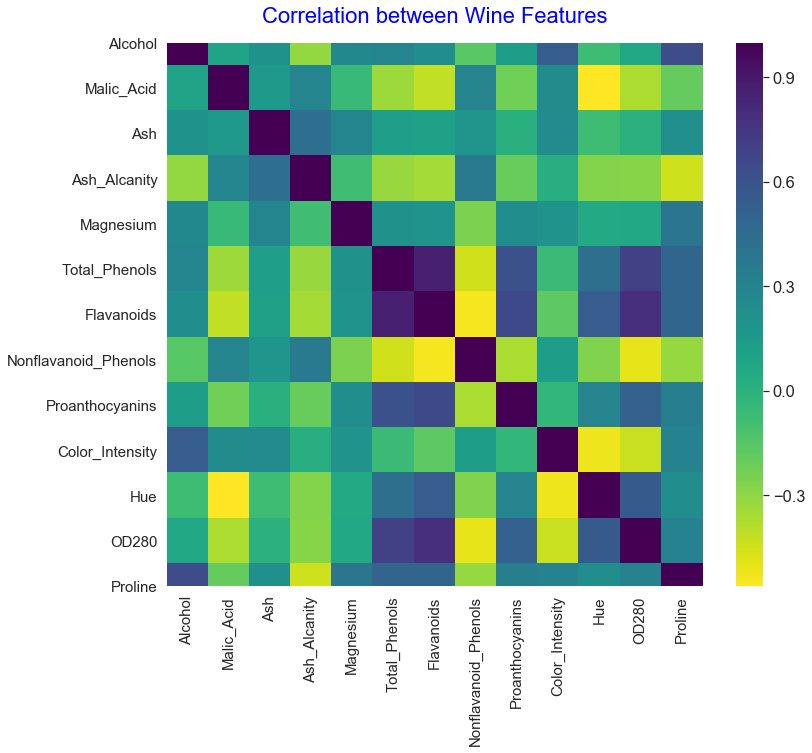

In [7]:
# plot the correlation function of the features

plt.figure(figsize = (12,10))
sns.heatmap(data_features.corr(), cmap = 'viridis_r')
plt.title('Correlation between Wine Features', fontsize = 22, pad = 20, c = 'blue')
plt.tick_params(labelsize = 15)
plt.show()

In [ ]:
# the plot shows some correlation between different features - the darker and lighter blue squares
# note that the darkest diagonal squares represent features self-correlation which is always unity

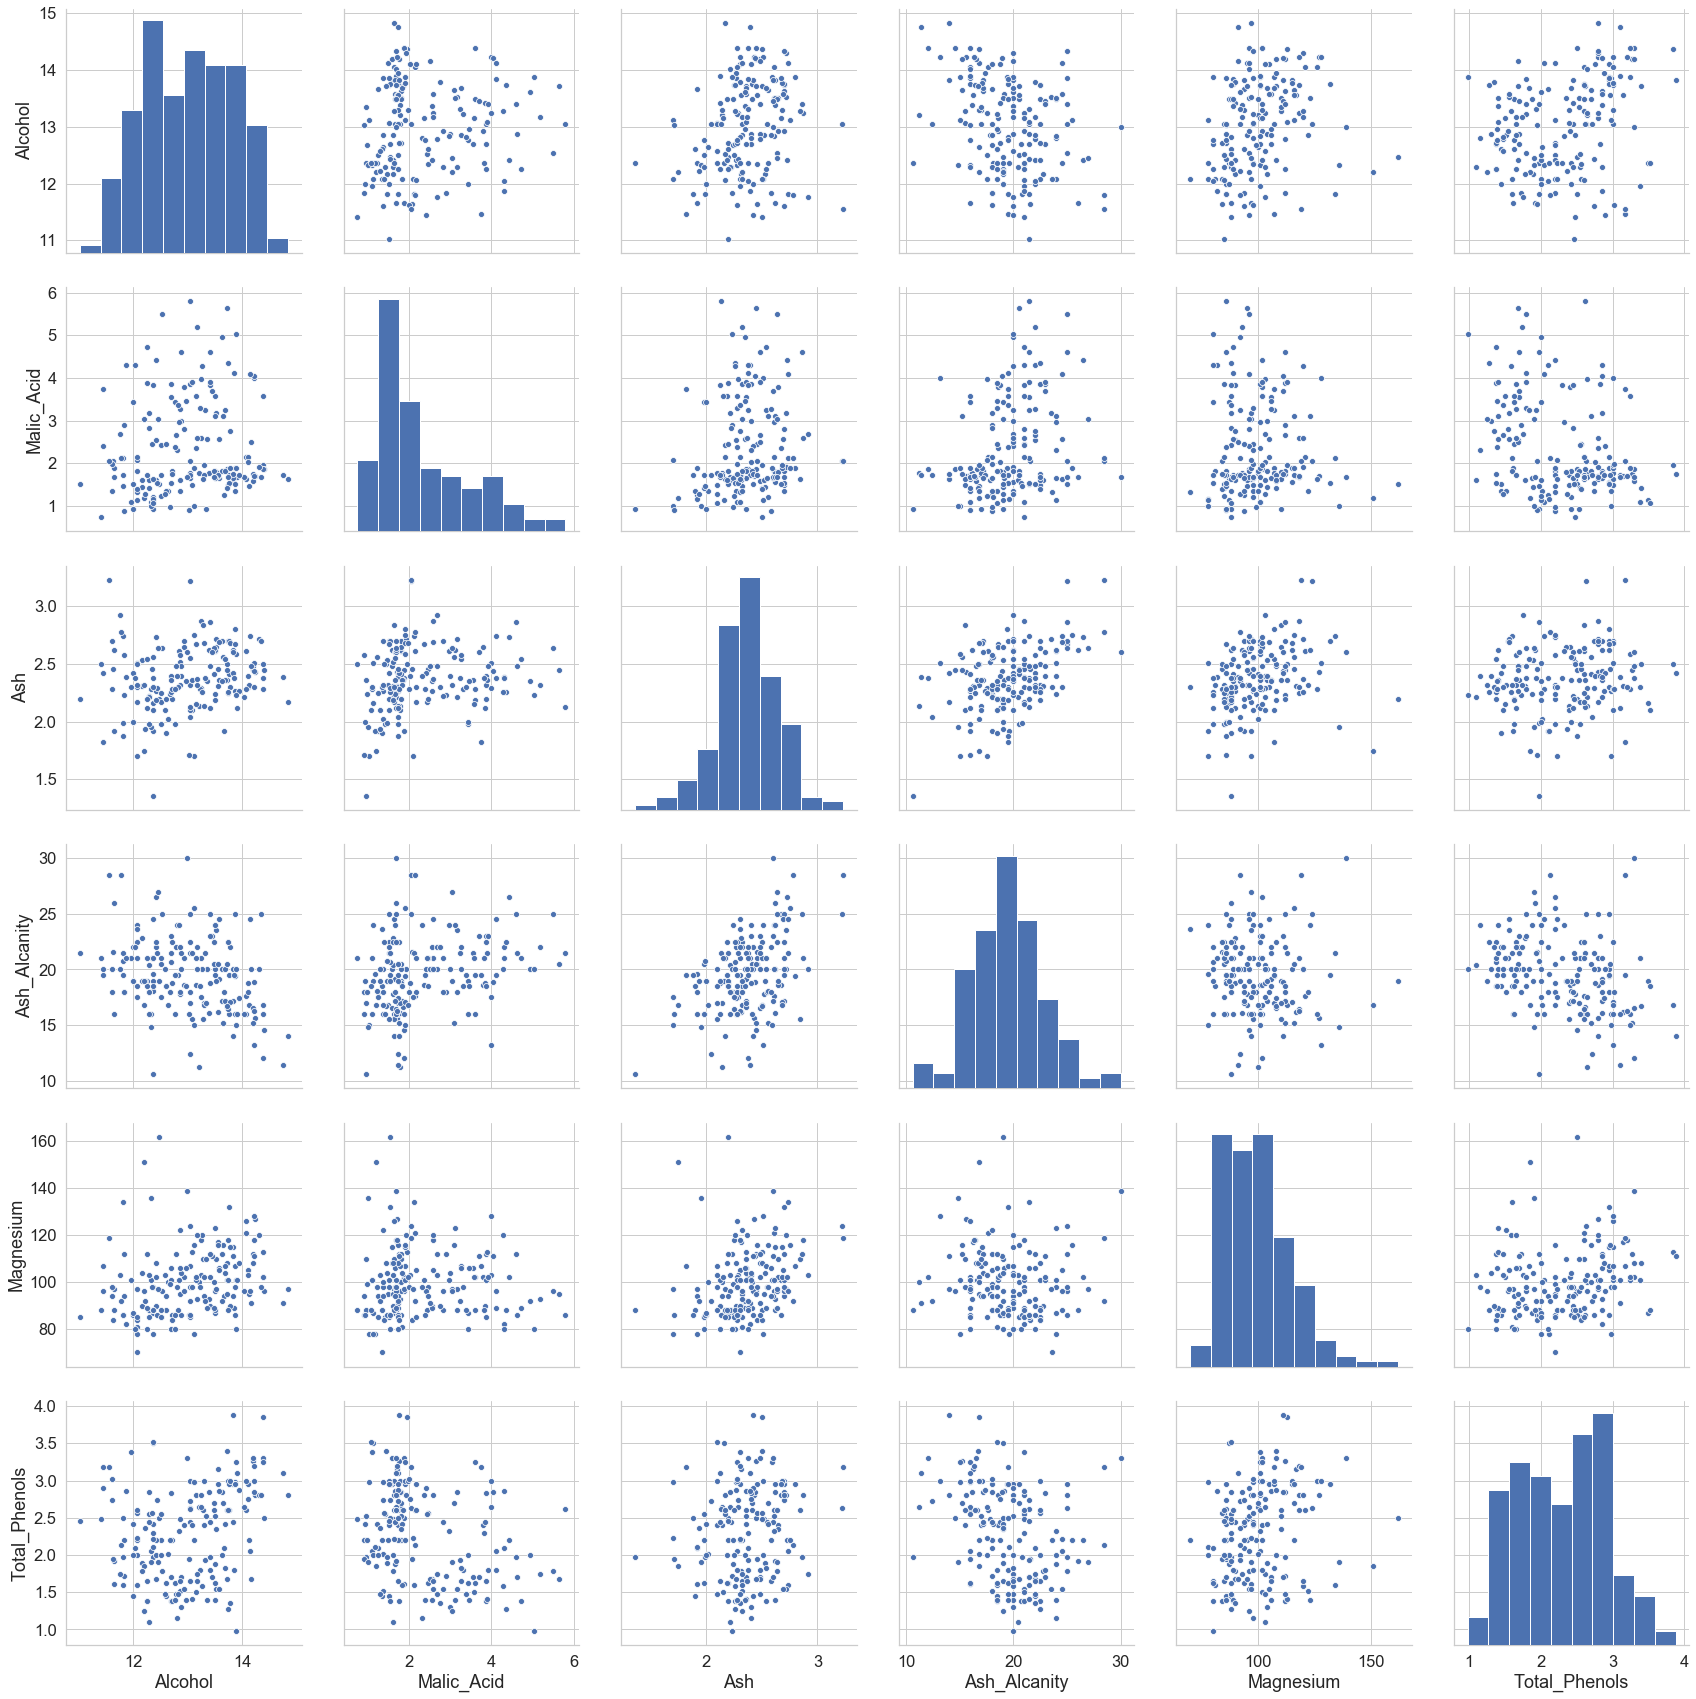

In [9]:
# create pairplot with 1st half of features

sns.pairplot(data_features.iloc[:, 0:6], height = 4, aspect = 1)
plt.tight_layout
plt.show()

In [ ]:
# nothing abnormal - e.g. extreme outliers, 0 values, unusual distributions - can be seen from plots 

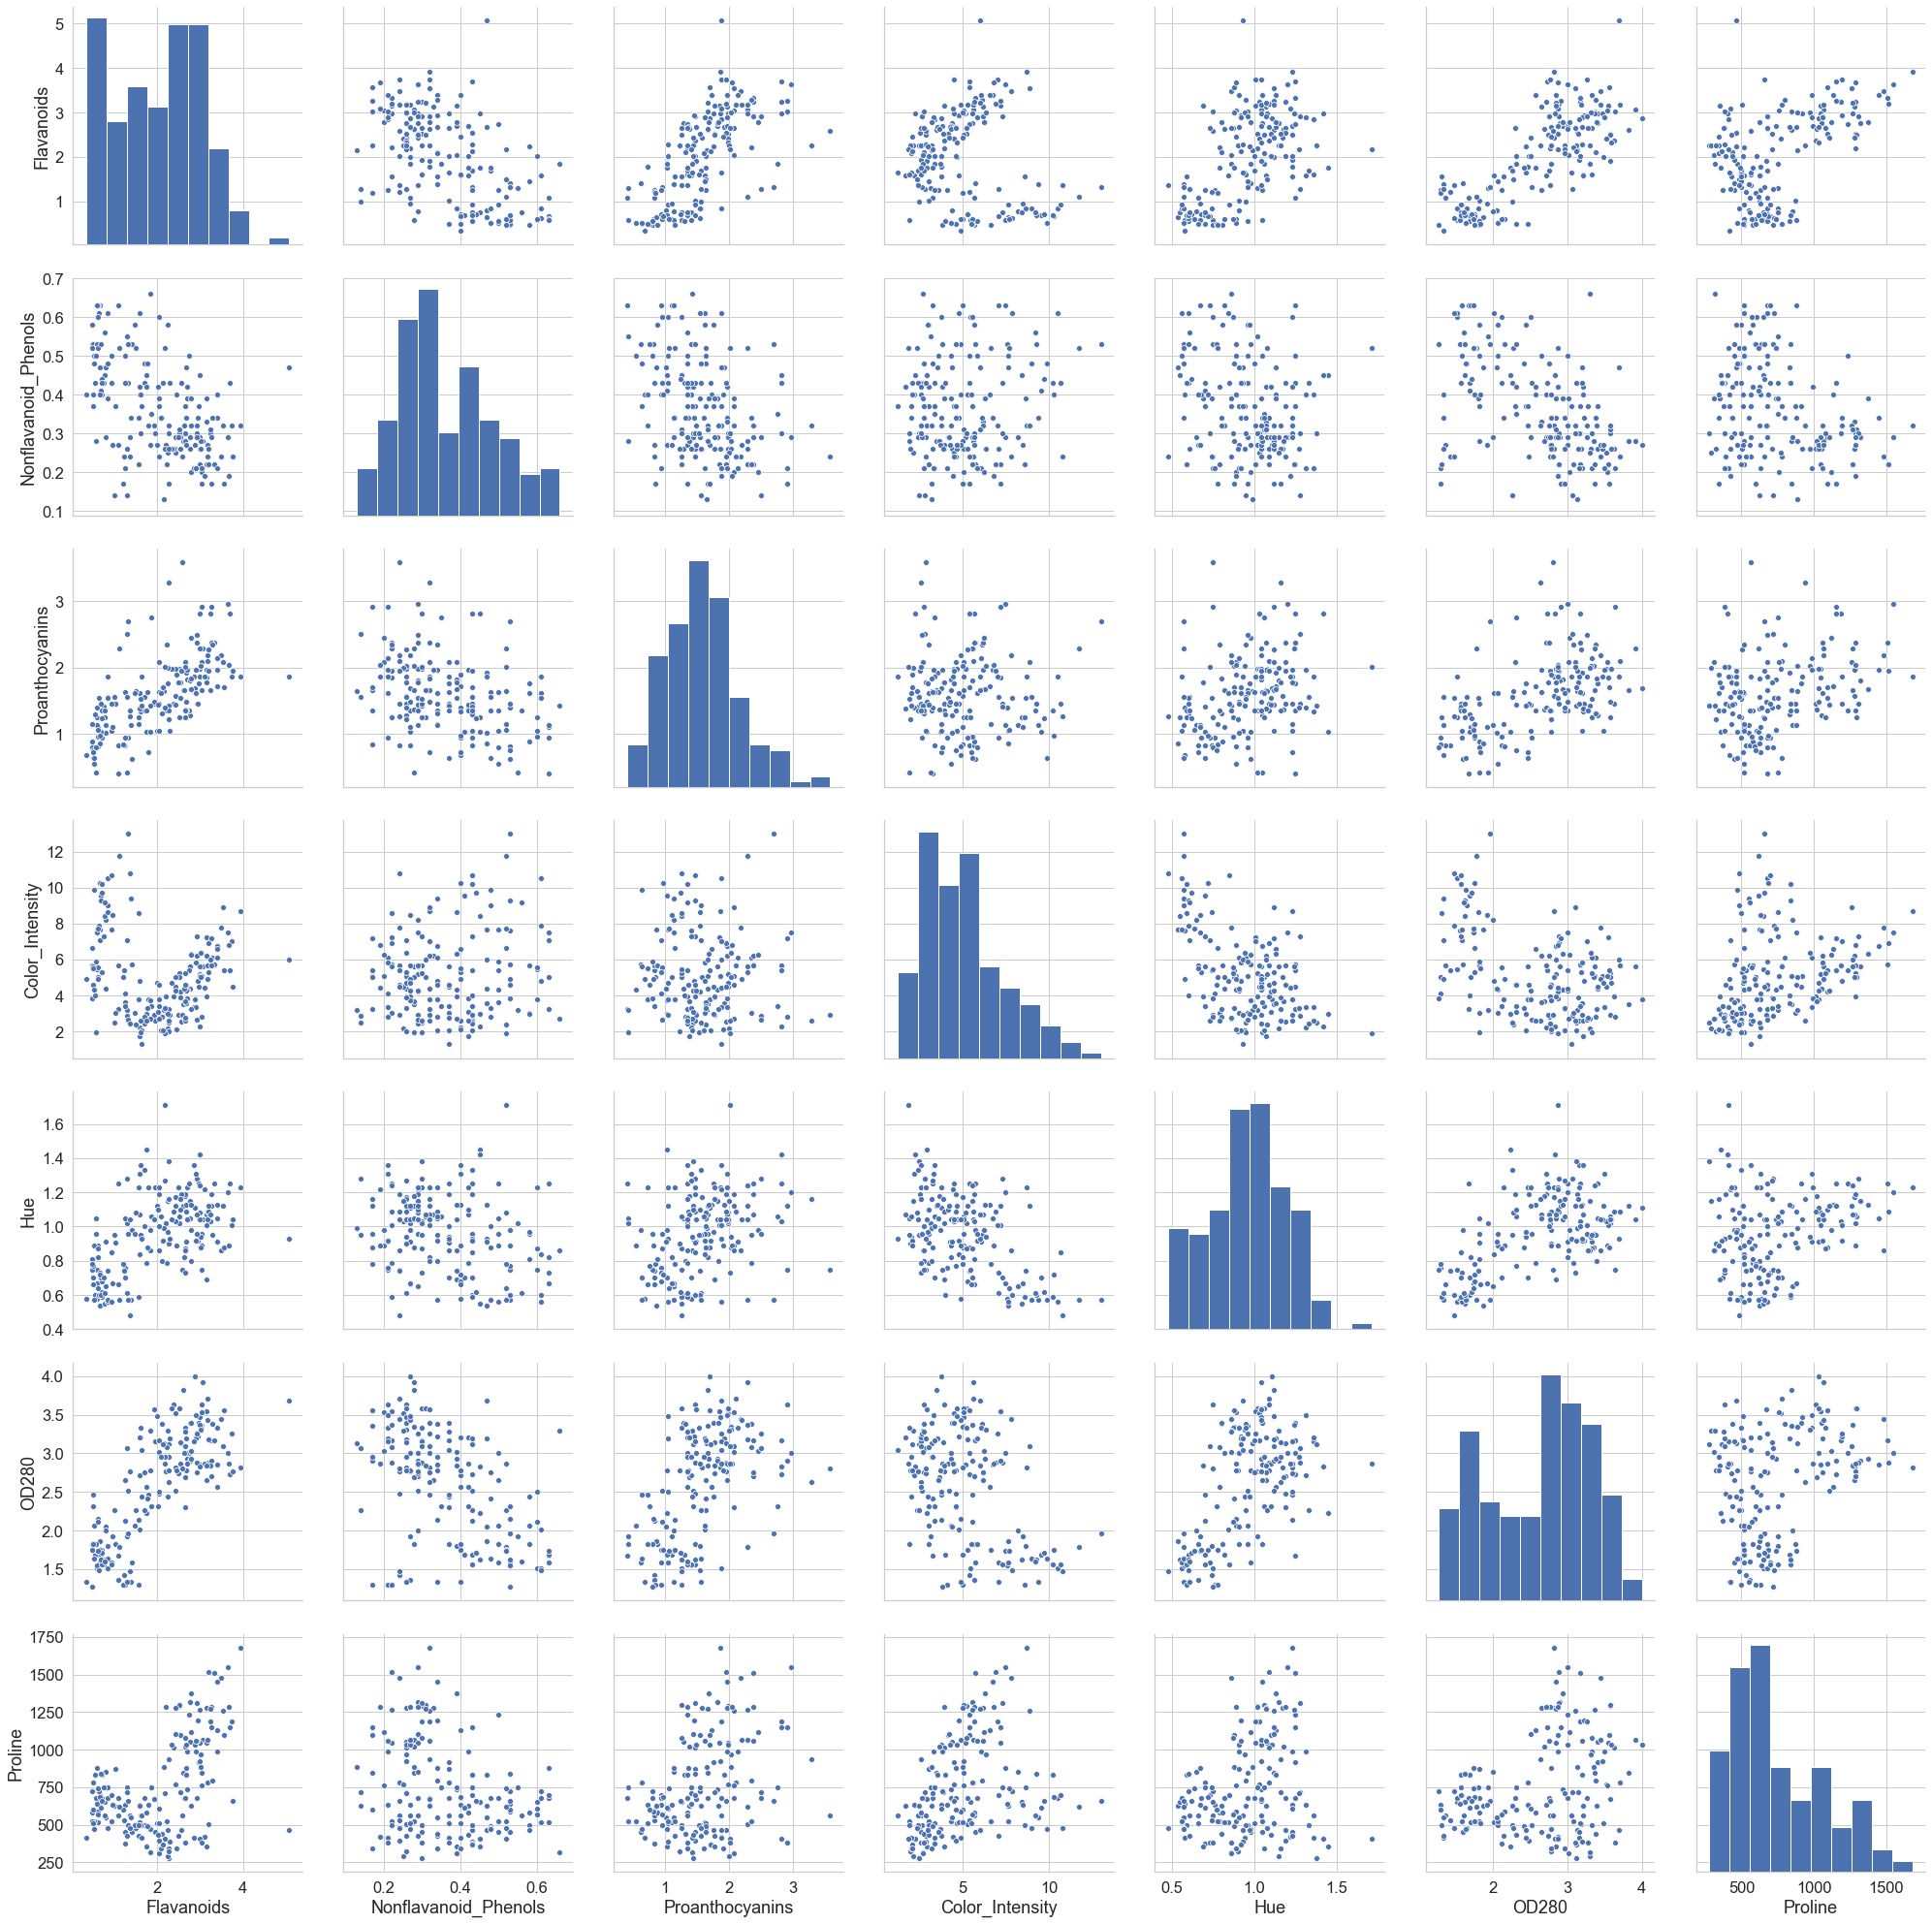

In [10]:
# create pairplot with 2nd half of features

sns.pairplot(data_features.iloc[:, 6:], height = 4, aspect = 1)
plt.tight_layout
plt.show()

In [ ]:
# here too, nothing strikes us as abnormal feature behavior

In [ ]:
# we are ready to proceed with the model
# however, before we continue we would like to make the problem more realistic
# we will use train_test_split to create two sets of data - "current" wine batches and "future" wine batch
# the goal is to predict the class of the wines from the future batch using model trained and validated with the current batch

In [11]:
# separate data in current and future data sets

from sklearn.model_selection import train_test_split

X_current, X_future, y_current, y_future = train_test_split(data_features, data_target, test_size = 0.1, random_state = 0)

# from here on we will use "current" data with our predictive model
# we reserve the "future" data set for the final prediction test

In [12]:
# scale X_current

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_current = scaler.fit_transform(X_current)

In [ ]:
# Use PCA to reduce the number of features

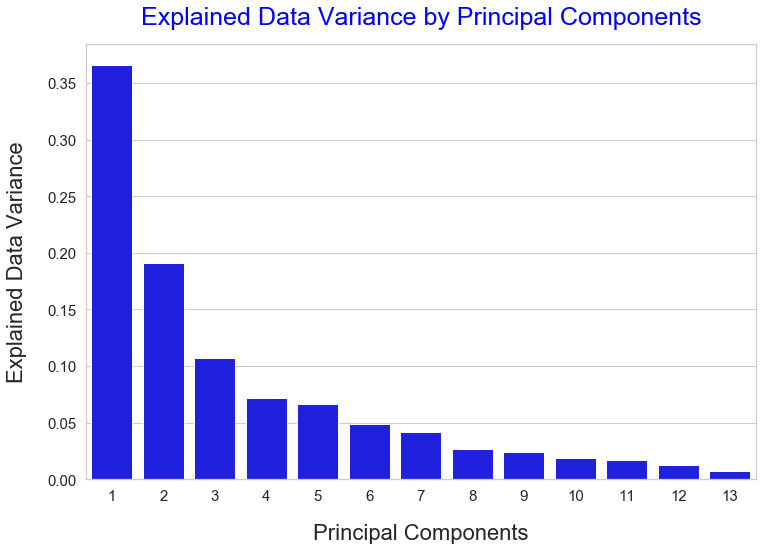

In [13]:
# first, determine the number of principal components which contribute most to the data variance

from sklearn.decomposition import PCA
pca = PCA(n_components = None)

pca.fit(X_current)
explained_var = pca.explained_variance_ratio_ # Variance by Principal Components

# visualizing the Variance by Principal Components

plt.figure(figsize = (12,8))

sns.barplot(np.arange(1, X_current.shape[1] + 1), explained_var, color = 'blue')
plt.xlabel('Principal Components', fontsize = 22, labelpad = 20)
plt.ylabel('Explained Data Variance', fontsize = 22, labelpad = 20)
plt.title('Explained Data Variance by Principal Components', fontsize = 25, c = 'blue', pad = 20)
plt.tick_params(labelsize = 15)

plt.show()

In [ ]:
# the results show that the first two principal components capture ~ 55% of the data variance
# this is sufficient to use a PCA model with 2 principal components
# note that principal components are not identical to the data features - 
    # they are combinations of features with different weights

In [14]:
# apply PCA with n_components = 2 to current data 

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X_current)

In [15]:
# use Logistic Regression with current data after PCA transformation

# first split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_current, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression

classifier_1 = LogisticRegression(solver='lbfgs', multi_class = 'auto', random_state = 0)
classifier_1.fit(X_train, y_train)

y_pred_1 = classifier_1.predict(X_test)

In [16]:
# compare predictions, y_pred_1, with test data, y_test

from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_1))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred_1))

Confusion Matrix:
[[13  0  0]
 [ 0 12  0]
 [ 0  0  7]]


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         7

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [ ]:
# the prediction accuracy is perfect 100%!

In [ ]:
# visualize the segments created by Logistic Regression model after applying PCA

In [17]:
# define mapping function

def mapPredictions(clf):
    # Create a dense grid of points to sample 
    xx, yy = np.meshgrid(np.arange(-ax_min, ax_max, .005),
                     np.arange(-ax_min, ax_min, .005))
    
    # Convert to Numpy arrays
    npx = xx.ravel()
    npy = yy.ravel()
    
    # Convert to a list of 2D points
    samplePoints = np.c_[npx, npy]
    
    # Generate predicted labels for each point
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(10, 10))
    
    Z = Z.reshape(xx.shape) # Reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6) # Draw the contour
    plt.scatter(X_p[:,0], X_p[:,1], s = 50, c=y_p, cmap = 'rainbow') # data points
    plt.xlabel('Component 1', fontsize = 22, labelpad = 15)
    plt.ylabel('Component 2', fontsize = 22, labelpad = 15)
    plt.title(title_str, fontsize = 25, c = 'blue', pad = 20)
    plt.tick_params(labelsize= 18)
    plt.show()

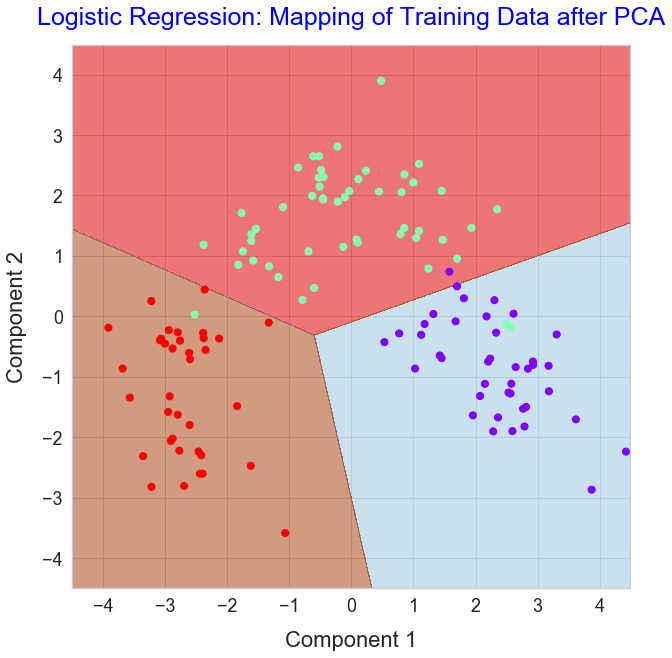

In [18]:
# Mapping of Training Data

ax_min = 4.5
ax_max = 4.5

X_p = X_train
y_p = y_train

title_str = 'Logistic Regression: Mapping of Training Data after PCA'

mapPredictions(classifier_1)

In [ ]:
# as we can see, despite the perfect accuracy of the predictions, there are few data points which are mislabeled

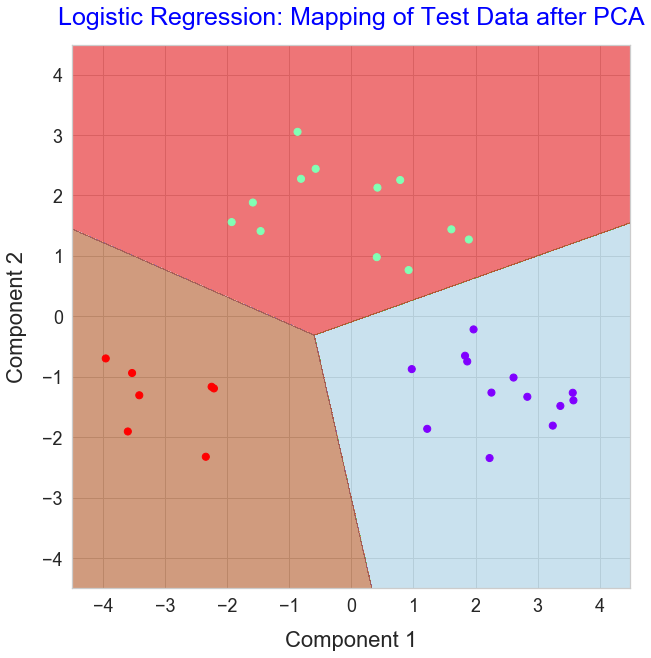

In [19]:
# Mapping of Test Data

X_p = X_test
y_p = y_test

title_str = 'Logistic Regression: Mapping of Test Data after PCA'

mapPredictions(classifier_1)

In [ ]:
# as already indicated by the confusion matrix, there are no mislabeled points

In [ ]:
# For comparison, let's use LDA followed by Logistic Regression

In [20]:
# LDA is a supervised algorithm, so we need to create train/test data sets from the current data before applying LDA

X_train, X_test, y_train, y_test = train_test_split(X_current, y_current, test_size = 0.2, random_state = 0)

In [21]:
# apply LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)

lda.fit(X_train, y_train)

X_train = lda.transform(X_train)
X_test = lda.transform(X_test)

In [22]:
# apply Logistic Regression Classifier to the LDA transformed data

classifier_2 = LogisticRegression(solver='lbfgs', multi_class = 'auto', random_state = 0)

classifier_2.fit(X_train, y_train)

y_pred_2 = classifier_2.predict(X_test)

In [23]:
# compare predictions, y_pred_2, with test data, y_test

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred_2))

Confusion Matrix:
[[ 9  0  0]
 [ 0 16  0]
 [ 0  1  6]]


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       0.94      1.00      0.97        16
           3       1.00      0.86      0.92         7

    accuracy                           0.97        32
   macro avg       0.98      0.95      0.96        32
weighted avg       0.97      0.97      0.97        32



In [ ]:
# here, we have one mislabeled point

In [ ]:
# visualize the segments created by Logistic Regression model after applying LDA

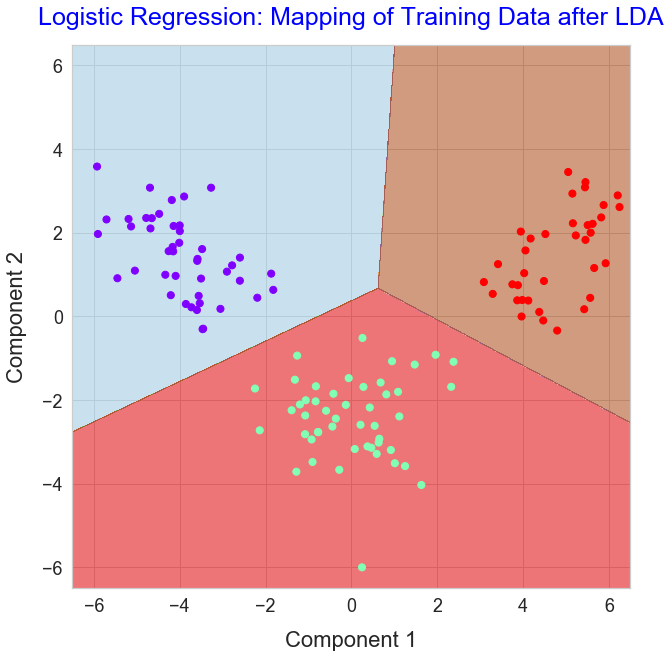

In [24]:
# Mapping of Training Data

ax_min = 6.5
ax_max = 6.5

X_p = X_train
y_p = y_train

title_str = 'Logistic Regression: Mapping of Training Data after LDA'

mapPredictions(classifier_2)

In [ ]:
# perfect separation of the training data - no mislabeled points
# in this case, due to LDA maximizing the separation between classes the mapping of the data is better

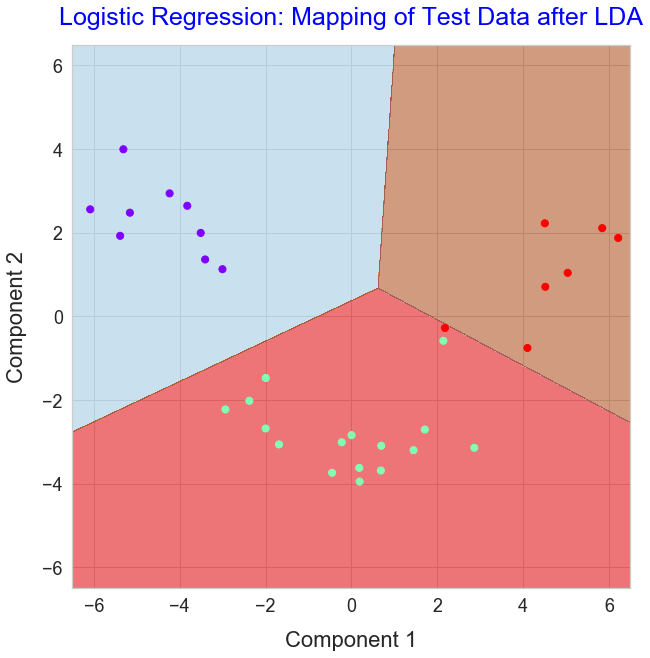

In [25]:
# Mapping of Test Data

X_p = X_test
y_p = y_test

title_str = 'Logistic Regression: Mapping of Test Data after LDA'

mapPredictions(classifier_2)

In [ ]:
# as already indicated by the confusion matrix, there is one mislabeled point
# overall, due to LDA maximizing the class separation Logistic Regression after applying LDA performs better

In [ ]:
# Now, the final test: use our models with the "future" dataset

In [26]:
# first scale X_future

X_future = scaler.transform(X_future) # we use the scaler obtained after fitting X_current

In [27]:
# apply PCA and LDA

X_pca = pca.transform(X_future)

X_lda = lda.transform(X_future)

In [28]:
# use classifier_1 (with PCA transformed data) and classifier_2 (with LDA transformed data) with "future" data set

y_future_pca = classifier_1.predict(X_pca)

y_future_lda = classifier_2.predict(X_lda)

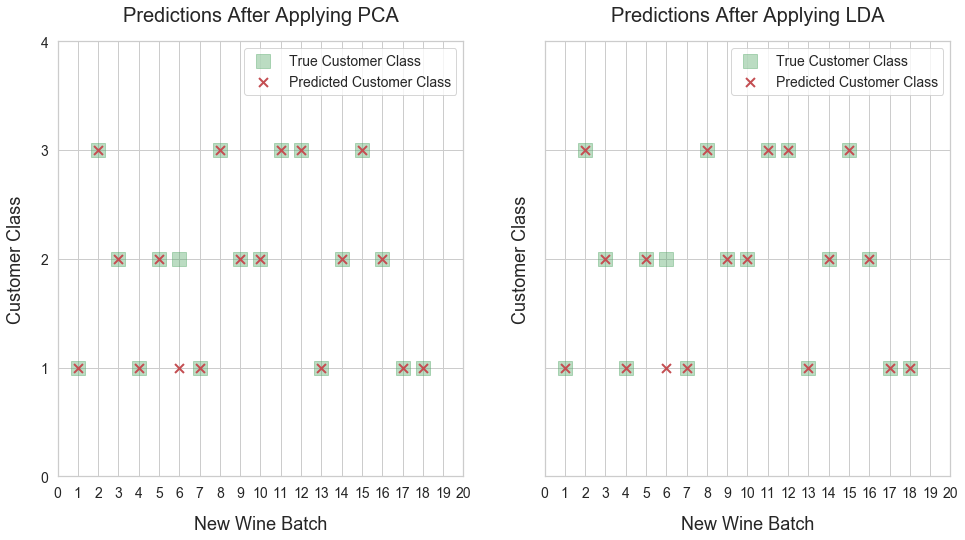

In [29]:
# plot the predictions and compare with the true labels, y_future

x_min = 0
x_max = 20
d_x = 1

y_min = 0
y_max = 4
d_y = 1

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16,8))

# labeled data
axes[0].scatter(np.arange(1, X_future.shape[0]+1), y_future, s = 200, marker = 's', c = 'g', alpha = 0.4, label = 'True Customer Class')
axes[0].scatter(np.arange(1, X_future.shape[0]+1), y_future_pca, s = 80, marker = 'x', c = 'r', lw = 2, label = 'Predicted Customer Class')
axes[0].set_title('Predictions After Applying PCA', fontsize = 20, pad = 20)
axes[0].set_xlabel('New Wine Batch', fontsize = 18, labelpad = 15)
axes[0].set_ylabel('Customer Class', fontsize = 18, labelpad = 15)
axes[0].legend(fontsize = 14)
axes[0].set_xlim(x_min, x_max)
axes[0].set_xticks(np.arange(x_min, x_max + d_x, d_x))
axes[0].set_ylim(y_min, y_max)
axes[0].set_yticks(np.arange(y_min, y_max + d_y, d_y))
axes[0].tick_params(labelsize = 14)


# predictions
axes[1].scatter(np.arange(1, X_future.shape[0]+1), y_future, s = 200, marker = 's', c = 'g', alpha = 0.4, label = 'True Customer Class')
axes[1].scatter(np.arange(1, X_future.shape[0]+1), y_future_lda, s = 80, marker = 'x', c = 'r', lw = 2, label = 'Predicted Customer Class')
axes[1].set_title('Predictions After Applying LDA', fontsize = 20, pad = 20)
axes[1].set_xlabel('New Wine Batch', fontsize = 18, labelpad = 15)
axes[1].set_ylabel('Customer Class', fontsize = 18, labelpad = 15)
axes[1].legend(fontsize = 14)
axes[1].set_xlim(x_min, x_max)
axes[1].set_xticks(np.arange(x_min, x_max + d_x, d_x))
axes[1].set_ylim(y_min, y_max)
axes[1].set_yticks(np.arange(y_min, y_max + d_y, d_y))
axes[1].tick_params(labelsize = 14)

plt.show()

In [ ]:
# Both models accurately classified the new ("future") batch of wine by customer segment, except for one wine
# The producer can offer the wines from the list below to the respective customers and expect near 100% buy 
    # wines # 1, 4, 6, 7, 13, 17, and 18 should be offered to Customer Class 1 - wine 6 is the only wrong choice
    # wines # 3, 5, 9, 10, 14, and 16 should be offered to Customer Class 2 - no mistakes here
    # wines # 2, 8, 11, 12, and 15 should be offered to Customer Class 3 - no mistakes here